# MT CARS EDA

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F5561157%2F2050532a55ceb8f6e0246de830e36b95%2Fdavid-leveque-esvWH-owWug-unsplash.jpg?generation=1603374118007153&alt=media)

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

In [76]:
data=pd.read_csv('mtcars.csv')

In [77]:
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


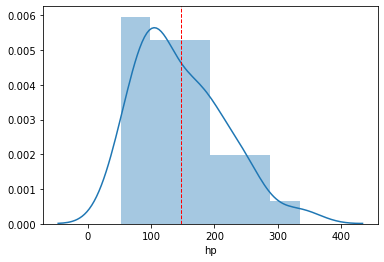

In [78]:
sns.distplot(data['hp'])
plt.axvline(data['hp'].values.mean(), color='red', linestyle='dashed', linewidth=1)


Over here the red dashed line represents  the mean of the horse power of the mt cars company which shows that the average horse power of the cars basically lines on 150 which is pretty much the average of the most of the cars in USA but looking at the bigger picture we also see that most of the cars lies in between the range of 50-100 horsepower .. ..

From this we can see most of the cars have horse power which is between 50-100 which is pretty low huh !!
It has been recorded that average cars have horse power like 170 -190 and small one's can have like 120-130 but 50-100 is low!!

In [79]:
data=data.dropna()

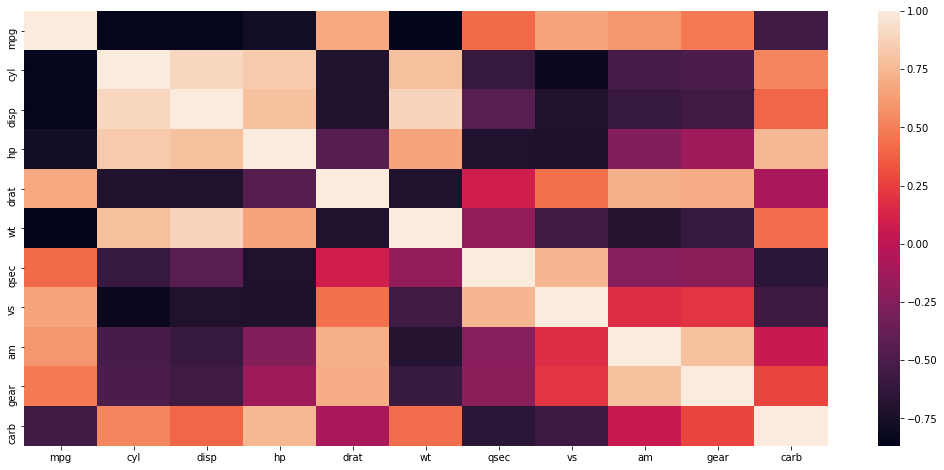

In [80]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr())


In [81]:
# Horse power is pretty dependent on  Cyl , Disp , wt and carb

In [82]:
x=data[['cyl']]

In [83]:
y=data['hp'].values

In [84]:
model1 = sm.OLS(x,y)
results = model1.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cyl   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              476.4
Date:                Mon, 02 Nov 2020   Prob (F-statistic):                    2.23e-20
Time:                        09:16:30   Log-Likelihood:                         -60.244
No. Observations:                  32   AIC:                                      122.5
Df Residuals:                      31   BIC:                                      124.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [125]:
# Trying out linear regression
x=data[['cyl','disp','wt','carb']].values

In [126]:
lr=LinearRegression()

In [127]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2)

In [128]:
lr.fit(X_train,y_train)

LinearRegression()

In [129]:
print('The mean absolute score is :',mean_absolute_error(lr.predict(X_test),y_test))

The mean absolute score is : 27.423820685494643


In [130]:
ad=KNeighborsRegressor(metric='euclidean', n_jobs=1, n_neighbors=1,
                    weights='distance')

In [131]:
ad.fit(X_train,y_train)

KNeighborsRegressor(metric='euclidean', n_jobs=1, n_neighbors=1,
                    weights='distance')

In [132]:
print('The mean absolute score is :',mean_absolute_error(ad.predict(X_test),y_test))

The mean absolute score is : 10.857142857142858
